Imports

In [464]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [465]:
df=pd.read_csv('C:\\Users\\Dell\\Downloads\\gpu_specs_prices_removed_weird_utf8.csv')

In [466]:
df

,name,brand,model,memory,memory_interface,length,interface,chipset,base_clock,clock_speed,frame_sync,price,item_url,used
0,MSI Gaming GeForce RTX 3090 24GB GDRR6X 384-Bi...,MSI,RTX 3090 GAMING X TRIO 24G,24 GB,GDRR6X,335 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1785 MHz,G-Sync,"$1,289.99",https://pcbuilder.net/component-details/graphi...,0
1,"EVGA GeForce RTX 3090 FTW3 Ultra Gaming, 24GB ...",EVGA,RTX 3090 FTW3 Ultra,24 GB,GDDR6X,300 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1800 MHz,G-Sync,"$1,199.99",https://pcbuilder.net/component-details/graphi...,0
2,ASUS ROG Strix NVIDIA GeForce RTX 3090 White O...,ASUS,ROG Strix RTX 3090 OC Edition,24 GB,GDDR6X,318.5 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1890 MHz,G-Sync,"$1,794.99",https://pcbuilder.net/component-details/graphi...,0
3,MSI Gaming GeForce RTX 3090 24GB GDRR6X 384-Bi...,MSI,RTX 3090 SUPRIM X 24G,24 GB,GDDR6X,336 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1875 MHz,G-Sync,"$2,017.21",https://pcbuilder.net/component-details/graphi...,0
4,GIGABYTE AORUS GeForce RTX 3090 Xtreme 24G Gra...,Gigabyte,AORUS RTX 3090 Xtreme 24G,24 GB,GDDR6X,319 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1860 MHz,G-Sync,"$3,399.99",https://pcbuilder.net/component-details/graphi...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"VisionTek Radeon 5450 2GB DDR3 (DVI-I, HDMI, V...",VisionTek,Radeon 5450,2 GB,DDR3,N/A,PCIe x16,Radeon HD 5450,650 MHz,1000 MHz,NaN,$64.99,https://pcbuilder.net/component-details/graphi...,0
307,Diamond Multimedia AMD Radeon HD 5450 PCI Expr...,DiamondMultimedia,5450PE31G,1 GB,DDR3,152 mm,PCIe x16,Radeon HD 5450,650 MHz,1000 MHz,NaN,$54.99,https://pcbuilder.net/component-details/graphi...,0
308,Sapphire Technology Technology Radeon 11276-02...,SapphireTechnology,Radeon RX VEGA 56,8 GB,HBM2,282 mm,PCIe x16,Radeon RX VEGA 56,1208 MHz,1512 MHz,FreeSync,NaN,https://pcbuilder.net/component-details/graphi...,0
309,ZOTAC Gaming GeForce RTX 2080 Ti AMP Extreme 1...,ZOTAC,GeForce RTX 2080 Ti AMP Extreme,11 GB,GDDR6,324 mm,PCIe x16,GeForce RTX 2080 Ti,1545 MHz,1815 MHz,G-Sync,NaN,https://pcbuilder.net/component-details/graphi...,0


In [467]:
df.columns

Index(['name', 'brand', 'model', 'memory', 'memory_interface', 'length',
       'interface', 'chipset', 'base_clock', 'clock_speed', 'frame_sync',
       'price', 'item_url', 'used'],
      dtype='object')

In [468]:
df.isnull().sum()

name                 0
brand                0
model                0
memory               0
memory_interface     0
length               0
interface            0
chipset              0
base_clock           0
clock_speed          0
frame_sync           8
price               38
item_url             0
used                 0
dtype: int64

In [469]:
df.dtypes

name                object
brand               object
model               object
memory              object
memory_interface    object
length              object
interface           object
chipset             object
base_clock          object
clock_speed         object
frame_sync          object
price               object
item_url            object
used                 int64
dtype: object

All are in string format other than used

item url is irrelevant to the price. so dropping it

In [470]:
df.drop(labels=['item_url'],axis=1)

,name,brand,model,memory,memory_interface,length,interface,chipset,base_clock,clock_speed,frame_sync,price,used
0,MSI Gaming GeForce RTX 3090 24GB GDRR6X 384-Bi...,MSI,RTX 3090 GAMING X TRIO 24G,24 GB,GDRR6X,335 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1785 MHz,G-Sync,"$1,289.99",0
1,"EVGA GeForce RTX 3090 FTW3 Ultra Gaming, 24GB ...",EVGA,RTX 3090 FTW3 Ultra,24 GB,GDDR6X,300 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1800 MHz,G-Sync,"$1,199.99",0
2,ASUS ROG Strix NVIDIA GeForce RTX 3090 White O...,ASUS,ROG Strix RTX 3090 OC Edition,24 GB,GDDR6X,318.5 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1890 MHz,G-Sync,"$1,794.99",0
3,MSI Gaming GeForce RTX 3090 24GB GDRR6X 384-Bi...,MSI,RTX 3090 SUPRIM X 24G,24 GB,GDDR6X,336 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1875 MHz,G-Sync,"$2,017.21",0
4,GIGABYTE AORUS GeForce RTX 3090 Xtreme 24G Gra...,Gigabyte,AORUS RTX 3090 Xtreme 24G,24 GB,GDDR6X,319 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1860 MHz,G-Sync,"$3,399.99",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"VisionTek Radeon 5450 2GB DDR3 (DVI-I, HDMI, V...",VisionTek,Radeon 5450,2 GB,DDR3,N/A,PCIe x16,Radeon HD 5450,650 MHz,1000 MHz,NaN,$64.99,0
307,Diamond Multimedia AMD Radeon HD 5450 PCI Expr...,DiamondMultimedia,5450PE31G,1 GB,DDR3,152 mm,PCIe x16,Radeon HD 5450,650 MHz,1000 MHz,NaN,$54.99,0
308,Sapphire Technology Technology Radeon 11276-02...,SapphireTechnology,Radeon RX VEGA 56,8 GB,HBM2,282 mm,PCIe x16,Radeon RX VEGA 56,1208 MHz,1512 MHz,FreeSync,NaN,0
309,ZOTAC Gaming GeForce RTX 2080 Ti AMP Extreme 1...,ZOTAC,GeForce RTX 2080 Ti AMP Extreme,11 GB,GDDR6,324 mm,PCIe x16,GeForce RTX 2080 Ti,1545 MHz,1815 MHz,G-Sync,NaN,0


There are null values in price but they are not visible as they are in string format

In [471]:
#df['price'] = df['price'].astype(int) #this is giving error as there are $ , in our value


In [472]:
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').str.strip()
df['price'] = df['price'].replace('N/A', pd.NA)
df['price'] = pd.to_numeric(df['price'], errors='coerce')


In [473]:
df.rename(columns={"price":"price (USD)"})

,name,brand,model,memory,memory_interface,length,interface,chipset,base_clock,clock_speed,frame_sync,price (USD),item_url,used
0,MSI Gaming GeForce RTX 3090 24GB GDRR6X 384-Bi...,MSI,RTX 3090 GAMING X TRIO 24G,24 GB,GDRR6X,335 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1785 MHz,G-Sync,1289.99,https://pcbuilder.net/component-details/graphi...,0
1,"EVGA GeForce RTX 3090 FTW3 Ultra Gaming, 24GB ...",EVGA,RTX 3090 FTW3 Ultra,24 GB,GDDR6X,300 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1800 MHz,G-Sync,1199.99,https://pcbuilder.net/component-details/graphi...,0
2,ASUS ROG Strix NVIDIA GeForce RTX 3090 White O...,ASUS,ROG Strix RTX 3090 OC Edition,24 GB,GDDR6X,318.5 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1890 MHz,G-Sync,1794.99,https://pcbuilder.net/component-details/graphi...,0
3,MSI Gaming GeForce RTX 3090 24GB GDRR6X 384-Bi...,MSI,RTX 3090 SUPRIM X 24G,24 GB,GDDR6X,336 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1875 MHz,G-Sync,2017.21,https://pcbuilder.net/component-details/graphi...,0
4,GIGABYTE AORUS GeForce RTX 3090 Xtreme 24G Gra...,Gigabyte,AORUS RTX 3090 Xtreme 24G,24 GB,GDDR6X,319 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1860 MHz,G-Sync,3399.99,https://pcbuilder.net/component-details/graphi...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"VisionTek Radeon 5450 2GB DDR3 (DVI-I, HDMI, V...",VisionTek,Radeon 5450,2 GB,DDR3,N/A,PCIe x16,Radeon HD 5450,650 MHz,1000 MHz,NaN,64.99,https://pcbuilder.net/component-details/graphi...,0
307,Diamond Multimedia AMD Radeon HD 5450 PCI Expr...,DiamondMultimedia,5450PE31G,1 GB,DDR3,152 mm,PCIe x16,Radeon HD 5450,650 MHz,1000 MHz,NaN,54.99,https://pcbuilder.net/component-details/graphi...,0
308,Sapphire Technology Technology Radeon 11276-02...,SapphireTechnology,Radeon RX VEGA 56,8 GB,HBM2,282 mm,PCIe x16,Radeon RX VEGA 56,1208 MHz,1512 MHz,FreeSync,NaN,https://pcbuilder.net/component-details/graphi...,0
309,ZOTAC Gaming GeForce RTX 2080 Ti AMP Extreme 1...,ZOTAC,GeForce RTX 2080 Ti AMP Extreme,11 GB,GDDR6,324 mm,PCIe x16,GeForce RTX 2080 Ti,1545 MHz,1815 MHz,G-Sync,NaN,https://pcbuilder.net/component-details/graphi...,0


item url and name are irrelevant to price

In [474]:
df=df.drop(labels=['name','item_url'],axis=1)

In [475]:
df.describe()

,price,used
count,269.000000,311.00000
mean,769.238178,0.33119
std,792.022711,0.47140
min,51.210000,0.00000
25%,335.670000,0.00000
50%,515.000000,0.00000
75%,899.950000,1.00000
max,6800.000000,1.00000


only price and used are numeric currently

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Dell\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


<Figure size 25000x25000 with 0 Axes>

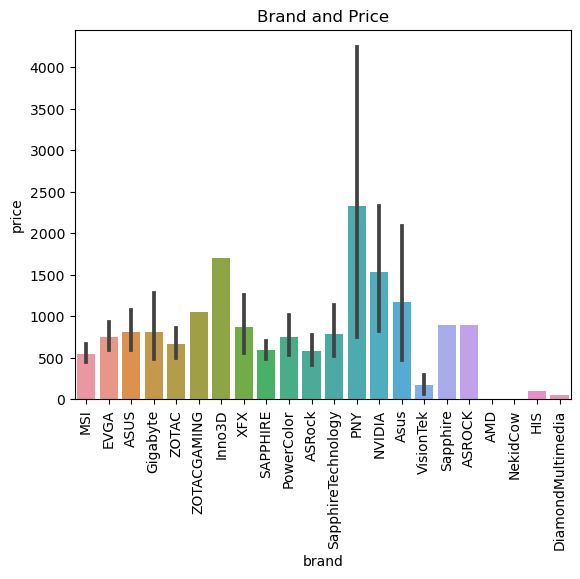

In [476]:
plt.title('Brand and Price')
sns.barplot(data=df,x='brand',y='price')
plt.xticks(rotation='vertical')
plt.Figure(figsize=(250,250))

Most expensive GPU is of PNY, INNO3D, NVIDIA. Clearly price depends on brand.

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Figure size 2.5e+06x2.5e+06 with 0 Axes>

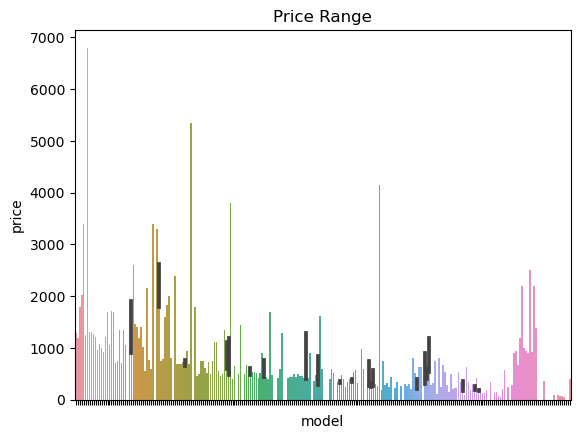

In [477]:
plt.title('Price Range')
ax=sns.barplot(data=df,x='model',y='price')
plt.xticks(rotation='vertical')
ax.set_xticklabels([])
plt.Figure(figsize=(25000,25000))

In [478]:
df.isnull().sum()

brand                0
model                0
memory               0
memory_interface     0
length               0
interface            0
chipset              0
base_clock           0
clock_speed          0
frame_sync           8
price               42
used                 0
dtype: int64

In [479]:
df['price'].isnull().sum()

42

In [480]:
df

,brand,model,memory,memory_interface,length,interface,chipset,base_clock,clock_speed,frame_sync,price,used
0,MSI,RTX 3090 GAMING X TRIO 24G,24 GB,GDRR6X,335 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1785 MHz,G-Sync,1289.99,0
1,EVGA,RTX 3090 FTW3 Ultra,24 GB,GDDR6X,300 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1800 MHz,G-Sync,1199.99,0
2,ASUS,ROG Strix RTX 3090 OC Edition,24 GB,GDDR6X,318.5 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1890 MHz,G-Sync,1794.99,0
3,MSI,RTX 3090 SUPRIM X 24G,24 GB,GDDR6X,336 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1875 MHz,G-Sync,2017.21,0
4,Gigabyte,AORUS RTX 3090 Xtreme 24G,24 GB,GDDR6X,319 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1860 MHz,G-Sync,3399.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...
306,VisionTek,Radeon 5450,2 GB,DDR3,N/A,PCIe x16,Radeon HD 5450,650 MHz,1000 MHz,NaN,64.99,0
307,DiamondMultimedia,5450PE31G,1 GB,DDR3,152 mm,PCIe x16,Radeon HD 5450,650 MHz,1000 MHz,NaN,54.99,0
308,SapphireTechnology,Radeon RX VEGA 56,8 GB,HBM2,282 mm,PCIe x16,Radeon RX VEGA 56,1208 MHz,1512 MHz,FreeSync,NaN,0
309,ZOTAC,GeForce RTX 2080 Ti AMP Extreme,11 GB,GDDR6,324 mm,PCIe x16,GeForce RTX 2080 Ti,1545 MHz,1815 MHz,G-Sync,NaN,0


In [481]:
df['used'].unique()

array([0, 1], dtype=int64)

In [482]:
c=0
d=0
for i in df['used']:
    if i==1:
        c+=1
    else:
        d+=1
print(f'number of used gpus are {c}')
print(f'number of new gpus are {d}')

number of used gpus are 103
number of new gpus are 208


In [483]:
df.columns

Index(['brand', 'model', 'memory', 'memory_interface', 'length', 'interface',
       'chipset', 'base_clock', 'clock_speed', 'frame_sync', 'price', 'used'],
      dtype='object')

In [484]:
attributes=['brand', 'model', 'memory', 'memory_interface', 'length', 'interface',
       'chipset', 'base_clock', 'clock_speed', 'frame_sync', 'price', 'used']

In [485]:
for i in attributes:
    print(f'{i}:{df[i].unique()}')

brand:['MSI' 'EVGA' 'ASUS' 'Gigabyte' 'ZOTAC' 'ZOTACGAMING' 'Inno3D' 'XFX'
 'SAPPHIRE' 'PowerColor' 'ASRock' 'SapphireTechnology' 'PNY' 'NVIDIA'
 'Asus' 'VisionTek' 'Sapphire' 'ASROCK' 'AMD' 'NekidCow' 'HIS'
 'DiamondMultimedia']
model:[' RTX 3090 GAMING X TRIO 24G ' ' RTX 3090 FTW3 Ultra '
 ' ROG Strix RTX 3090 OC Edition ' ' RTX 3090 SUPRIM X 24G '
 ' AORUS RTX 3090 Xtreme 24G ' ' TUF Gaming RTX 3090 OC Edition '
 ' AORUS RTX 3090 Xtreme Waterforce 24G ' ' RTX 3090 XC3 Ultra '
 ' RTX 3090 Gaming OC 24G ' ' RTX 3090 VENTUS 3X 24G OC '
 ' RTX 3090 Trinity OC 24GB ' ' RTX 3080 Ti Gaming X Trio 12G '
 ' RTX 3080 Ti FTW3 Ultra ' ' RTX 3080 Ti XC3 ULTRA '
 ' RTX 3080 Ti Ventus 3X 12G OC ' ' RTX 3080 Ti VISION OC 12GB '
 ' AORUS RTX 3080 Ti Xtreme 10G ' ' RTX 3080 Ti Trinity OC 12GB '
 ' RTX 3080 Ti iChill X4 ' ' Speedster MERC319 RX-68XTACBD9 '
 ' RX 6800 XT Pulse OC ' ' Red Devil RX 6800XT 16GB OC '
 ' RX 6800 XT Gaming X Trio 16G ' ' RX 6800 XT PG D '
 ' RX 6800 XT Nitro+ ' ' ROG Strix L

The analysis is quite difficult cuurently for me but i will try to analyse. Will countinue it by taking reference from laptop price prediciton by campusx(Nitish Sir)

Memory, base clock and clock speed all have same units for whole dataset. memory is in GB, Base clock and clock speed all in Mhz.
Length is an issue as it is given in two units mm,w.

only one instance is in w. so lets drop that row

In [486]:
df

,brand,model,memory,memory_interface,length,interface,chipset,base_clock,clock_speed,frame_sync,price,used
0,MSI,RTX 3090 GAMING X TRIO 24G,24 GB,GDRR6X,335 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1785 MHz,G-Sync,1289.99,0
1,EVGA,RTX 3090 FTW3 Ultra,24 GB,GDDR6X,300 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1800 MHz,G-Sync,1199.99,0
2,ASUS,ROG Strix RTX 3090 OC Edition,24 GB,GDDR6X,318.5 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1890 MHz,G-Sync,1794.99,0
3,MSI,RTX 3090 SUPRIM X 24G,24 GB,GDDR6X,336 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1875 MHz,G-Sync,2017.21,0
4,Gigabyte,AORUS RTX 3090 Xtreme 24G,24 GB,GDDR6X,319 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1860 MHz,G-Sync,3399.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...
306,VisionTek,Radeon 5450,2 GB,DDR3,N/A,PCIe x16,Radeon HD 5450,650 MHz,1000 MHz,NaN,64.99,0
307,DiamondMultimedia,5450PE31G,1 GB,DDR3,152 mm,PCIe x16,Radeon HD 5450,650 MHz,1000 MHz,NaN,54.99,0
308,SapphireTechnology,Radeon RX VEGA 56,8 GB,HBM2,282 mm,PCIe x16,Radeon RX VEGA 56,1208 MHz,1512 MHz,FreeSync,NaN,0
309,ZOTAC,GeForce RTX 2080 Ti AMP Extreme,11 GB,GDDR6,324 mm,PCIe x16,GeForce RTX 2080 Ti,1545 MHz,1815 MHz,G-Sync,NaN,0


In [487]:
df.index[df['length']==' 300 W ']

Index([288], dtype='int64')

as i do not know how to convert it lets drop this row

In [488]:
df.loc[288]

brand                                ASROCK
model                RX 6900 XT PGD 16G OC 
memory                               16 GB 
memory_interface                     GDDR6 
length                               300 W 
interface                         PCIe x16 
chipset                  Radeon RX 6900 XT 
base_clock                        1925 MHz 
clock_speed                       2340 MHz 
frame_sync                        FreeSync 
price                                899.24
used                                      0
Name: 288, dtype: object

In [489]:
df=df.drop(288,axis=0)

In [490]:
df

,brand,model,memory,memory_interface,length,interface,chipset,base_clock,clock_speed,frame_sync,price,used
0,MSI,RTX 3090 GAMING X TRIO 24G,24 GB,GDRR6X,335 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1785 MHz,G-Sync,1289.99,0
1,EVGA,RTX 3090 FTW3 Ultra,24 GB,GDDR6X,300 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1800 MHz,G-Sync,1199.99,0
2,ASUS,ROG Strix RTX 3090 OC Edition,24 GB,GDDR6X,318.5 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1890 MHz,G-Sync,1794.99,0
3,MSI,RTX 3090 SUPRIM X 24G,24 GB,GDDR6X,336 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1875 MHz,G-Sync,2017.21,0
4,Gigabyte,AORUS RTX 3090 Xtreme 24G,24 GB,GDDR6X,319 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1860 MHz,G-Sync,3399.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...
306,VisionTek,Radeon 5450,2 GB,DDR3,N/A,PCIe x16,Radeon HD 5450,650 MHz,1000 MHz,NaN,64.99,0
307,DiamondMultimedia,5450PE31G,1 GB,DDR3,152 mm,PCIe x16,Radeon HD 5450,650 MHz,1000 MHz,NaN,54.99,0
308,SapphireTechnology,Radeon RX VEGA 56,8 GB,HBM2,282 mm,PCIe x16,Radeon RX VEGA 56,1208 MHz,1512 MHz,FreeSync,NaN,0
309,ZOTAC,GeForce RTX 2080 Ti AMP Extreme,11 GB,GDDR6,324 mm,PCIe x16,GeForce RTX 2080 Ti,1545 MHz,1815 MHz,G-Sync,NaN,0


In [491]:
df.index[df['length']==' 300 W ']

Index([], dtype='int64')

Now length unit is constant

memory:[' 24 GB ' ' 12 GB ' ' 16 GB ' ' 10 GB ' ' 11 GB ' ' 8 GB ' ' 48 GB '
 ' 6 GB ' ' 6Â\xa0GB ' ' 4 GB ' ' 8Â\xa0GB ' ' 3 GB ' ' 4Â\xa0GB '
 ' 2 GB ' ' 1Â\xa0GB ' ' 1 GB ' ' 0.5 GB ']
interface:[' PCIe x16 ' ' PCI Express 4.0 x16 ' ' PCIe 4.0x16 '
 ' PCI-Express 4.0 x16 ' ' PCIe 4.0 x16 ' ' PCI Express 3.0 x16 '
 ' PCI ExpressÂ\xa03.0Â\xa0 ' ' PCI ExpressÂ\xa03.0Â\xa0x16 '
 ' PCI ExpressÂ\xa02.0Â\xa0x16 ' ' PCIe x1 ']
chipset:[' GeForce RTX 3090 ' ' GeForce RTX 3080 Ti ' ' Radeon RX 6800 XT '
 ' GeForce RTX 3080 ' ' Radeon RX 6800 ' ' TITAN RTX '
 ' GeForce RTX 2080 Ti ' ' GeForce RTX 3070 Ti ' ' Quadro RTX 8000 '
 ' GeForce RTX 3070 ' ' Titan V ' ' Radeon RX 6700 XT '
 ' GeForce RTX 2080 SUPER ' ' GeForce RTX 2080 '
 ' GeForce RTX 2070 SUPER ' ' GeForce GTX 1080 Ti ' ' Radeon RX 5700 XT '
 ' GeForce RTX 2070 ' ' GeForce RTX 3060 ' ' GeForce RTX 2060 SUPER '
 ' Radeon RX 5700 ' ' GeForce RTX 2060 ' ' GeForce GTX 1080 '
 ' Radeon RX 5600 XT ' ' GeForce GTX 1070 Ti ' ' GeForce GTX 1660 Ti '
 ' GeForce GTX 1660 SUPER ' ' GeForce GTX 1070 ' ' GeForce GTX 1660 '
 ' GeForceÂ\xa0GTXÂ\xa01660 ' ' Radeon RX 5500 XT '
 ' GeForce GTX 1650 SUPER ' ' Radeon RX 590 ' ' RadeonÂ\xa0RXÂ\xa0580 '
 ' Radeon RX 580 ' ' GeForce GTX 1060 ' ' Radeon RX 570 '
 ' GeForce GTX 1650 ' ' GeForceÂ\xa0GTXÂ\xa01650 ' ' GeForce GTX 1050 Ti '
 ' GeForceÂ\xa0GTXÂ\xa01050Â\xa0Ti ' ' GeForce GTX 1050 '
 ' Radeon RX 550 ' ' GeForce GT 1030 ' ' GeForce GT 710 '
 ' GeForceÂ\xa0GTÂ\xa0710 ' ' GeForce GTX 1060 3GB ' ' Radeon RX VEGA 56 '
 ' Radeon RX VEGA 64 ' ' GeForce GTX 1650 G5 ' ' GeForce GTX 1060 6GB '
 ' GeForce RTX 2070 Super ' ' GeForce RTX 2080 Super '
 ' Radeon RX 6900 XT ' ' Vega Frontier Edition ' ' Radeon HD 6870 '
 ' Radeon HD 6850 ' ' Radeon HD 6770 ' ' Radeon HD 6750 '
 ' Radeon HD 5750 ' ' Radeon HD 5450 ' ' Radeon HD 5770 ']
<br>
 There is a weird symbol A^\xa in these data. Lets remove it

In [492]:
df

,brand,model,memory,memory_interface,length,interface,chipset,base_clock,clock_speed,frame_sync,price,used
0,MSI,RTX 3090 GAMING X TRIO 24G,24 GB,GDRR6X,335 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1785 MHz,G-Sync,1289.99,0
1,EVGA,RTX 3090 FTW3 Ultra,24 GB,GDDR6X,300 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1800 MHz,G-Sync,1199.99,0
2,ASUS,ROG Strix RTX 3090 OC Edition,24 GB,GDDR6X,318.5 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1890 MHz,G-Sync,1794.99,0
3,MSI,RTX 3090 SUPRIM X 24G,24 GB,GDDR6X,336 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1875 MHz,G-Sync,2017.21,0
4,Gigabyte,AORUS RTX 3090 Xtreme 24G,24 GB,GDDR6X,319 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1860 MHz,G-Sync,3399.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...
306,VisionTek,Radeon 5450,2 GB,DDR3,N/A,PCIe x16,Radeon HD 5450,650 MHz,1000 MHz,NaN,64.99,0
307,DiamondMultimedia,5450PE31G,1 GB,DDR3,152 mm,PCIe x16,Radeon HD 5450,650 MHz,1000 MHz,NaN,54.99,0
308,SapphireTechnology,Radeon RX VEGA 56,8 GB,HBM2,282 mm,PCIe x16,Radeon RX VEGA 56,1208 MHz,1512 MHz,FreeSync,NaN,0
309,ZOTAC,GeForce RTX 2080 Ti AMP Extreme,11 GB,GDDR6,324 mm,PCIe x16,GeForce RTX 2080 Ti,1545 MHz,1815 MHz,G-Sync,NaN,0


Task->There is a weird symbol A^\xa in these data. Lets remove it manually in excel.

In [493]:
df

,brand,model,memory,memory_interface,length,interface,chipset,base_clock,clock_speed,frame_sync,price,used
0,MSI,RTX 3090 GAMING X TRIO 24G,24 GB,GDRR6X,335 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1785 MHz,G-Sync,1289.99,0
1,EVGA,RTX 3090 FTW3 Ultra,24 GB,GDDR6X,300 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1800 MHz,G-Sync,1199.99,0
2,ASUS,ROG Strix RTX 3090 OC Edition,24 GB,GDDR6X,318.5 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1890 MHz,G-Sync,1794.99,0
3,MSI,RTX 3090 SUPRIM X 24G,24 GB,GDDR6X,336 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1875 MHz,G-Sync,2017.21,0
4,Gigabyte,AORUS RTX 3090 Xtreme 24G,24 GB,GDDR6X,319 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1860 MHz,G-Sync,3399.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...
306,VisionTek,Radeon 5450,2 GB,DDR3,N/A,PCIe x16,Radeon HD 5450,650 MHz,1000 MHz,NaN,64.99,0
307,DiamondMultimedia,5450PE31G,1 GB,DDR3,152 mm,PCIe x16,Radeon HD 5450,650 MHz,1000 MHz,NaN,54.99,0
308,SapphireTechnology,Radeon RX VEGA 56,8 GB,HBM2,282 mm,PCIe x16,Radeon RX VEGA 56,1208 MHz,1512 MHz,FreeSync,NaN,0
309,ZOTAC,GeForce RTX 2080 Ti AMP Extreme,11 GB,GDDR6,324 mm,PCIe x16,GeForce RTX 2080 Ti,1545 MHz,1815 MHz,G-Sync,NaN,0


In [494]:
df['memory']=df['memory'].str.replace('GB','')

In [495]:
df

,brand,model,memory,memory_interface,length,interface,chipset,base_clock,clock_speed,frame_sync,price,used
0,MSI,RTX 3090 GAMING X TRIO 24G,24,GDRR6X,335 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1785 MHz,G-Sync,1289.99,0
1,EVGA,RTX 3090 FTW3 Ultra,24,GDDR6X,300 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1800 MHz,G-Sync,1199.99,0
2,ASUS,ROG Strix RTX 3090 OC Edition,24,GDDR6X,318.5 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1890 MHz,G-Sync,1794.99,0
3,MSI,RTX 3090 SUPRIM X 24G,24,GDDR6X,336 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1875 MHz,G-Sync,2017.21,0
4,Gigabyte,AORUS RTX 3090 Xtreme 24G,24,GDDR6X,319 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1860 MHz,G-Sync,3399.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...
306,VisionTek,Radeon 5450,2,DDR3,N/A,PCIe x16,Radeon HD 5450,650 MHz,1000 MHz,NaN,64.99,0
307,DiamondMultimedia,5450PE31G,1,DDR3,152 mm,PCIe x16,Radeon HD 5450,650 MHz,1000 MHz,NaN,54.99,0
308,SapphireTechnology,Radeon RX VEGA 56,8,HBM2,282 mm,PCIe x16,Radeon RX VEGA 56,1208 MHz,1512 MHz,FreeSync,NaN,0
309,ZOTAC,GeForce RTX 2080 Ti AMP Extreme,11,GDDR6,324 mm,PCIe x16,GeForce RTX 2080 Ti,1545 MHz,1815 MHz,G-Sync,NaN,0


Model name is looking irrelevant as some brands have expensive laptops in general irrespective of the specs but series/models generally have specs which increases the price.

In [496]:
df.drop('model',axis=1,inplace=True)

In [497]:
df

,brand,memory,memory_interface,length,interface,chipset,base_clock,clock_speed,frame_sync,price,used
0,MSI,24,GDRR6X,335 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1785 MHz,G-Sync,1289.99,0
1,EVGA,24,GDDR6X,300 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1800 MHz,G-Sync,1199.99,0
2,ASUS,24,GDDR6X,318.5 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1890 MHz,G-Sync,1794.99,0
3,MSI,24,GDDR6X,336 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1875 MHz,G-Sync,2017.21,0
4,Gigabyte,24,GDDR6X,319 mm,PCIe x16,GeForce RTX 3090,1395 MHz,1860 MHz,G-Sync,3399.99,0
...,...,...,...,...,...,...,...,...,...,...,...
306,VisionTek,2,DDR3,N/A,PCIe x16,Radeon HD 5450,650 MHz,1000 MHz,NaN,64.99,0
307,DiamondMultimedia,1,DDR3,152 mm,PCIe x16,Radeon HD 5450,650 MHz,1000 MHz,NaN,54.99,0
308,SapphireTechnology,8,HBM2,282 mm,PCIe x16,Radeon RX VEGA 56,1208 MHz,1512 MHz,FreeSync,NaN,0
309,ZOTAC,11,GDDR6,324 mm,PCIe x16,GeForce RTX 2080 Ti,1545 MHz,1815 MHz,G-Sync,NaN,0


In [498]:
df['length']=df['length'].str.replace('mm','')

In [499]:
df.rename(columns={'length':'length (mm)'}, inplace = True)

In [500]:
df

,brand,memory,memory_interface,length (mm),interface,chipset,base_clock,clock_speed,frame_sync,price,used
0,MSI,24,GDRR6X,335,PCIe x16,GeForce RTX 3090,1395 MHz,1785 MHz,G-Sync,1289.99,0
1,EVGA,24,GDDR6X,300,PCIe x16,GeForce RTX 3090,1395 MHz,1800 MHz,G-Sync,1199.99,0
2,ASUS,24,GDDR6X,318.5,PCIe x16,GeForce RTX 3090,1395 MHz,1890 MHz,G-Sync,1794.99,0
3,MSI,24,GDDR6X,336,PCIe x16,GeForce RTX 3090,1395 MHz,1875 MHz,G-Sync,2017.21,0
4,Gigabyte,24,GDDR6X,319,PCIe x16,GeForce RTX 3090,1395 MHz,1860 MHz,G-Sync,3399.99,0
...,...,...,...,...,...,...,...,...,...,...,...
306,VisionTek,2,DDR3,N/A,PCIe x16,Radeon HD 5450,650 MHz,1000 MHz,NaN,64.99,0
307,DiamondMultimedia,1,DDR3,152,PCIe x16,Radeon HD 5450,650 MHz,1000 MHz,NaN,54.99,0
308,SapphireTechnology,8,HBM2,282,PCIe x16,Radeon RX VEGA 56,1208 MHz,1512 MHz,FreeSync,NaN,0
309,ZOTAC,11,GDDR6,324,PCIe x16,GeForce RTX 2080 Ti,1545 MHz,1815 MHz,G-Sync,NaN,0


dropping prices with value as Nan

In [501]:
df.dtypes

brand                object
memory               object
memory_interface     object
length (mm)          object
interface            object
chipset              object
base_clock           object
clock_speed          object
frame_sync           object
price               float64
used                  int64
dtype: object

In [502]:
df.isnull().sum()

brand                0
memory               0
memory_interface     0
length (mm)          0
interface            0
chipset              0
base_clock           0
clock_speed          0
frame_sync           8
price               42
used                 0
dtype: int64

removed 42 prices which were NaN and replaced them with empty cells in excel

In [503]:
df.dropna(axis=0)

,brand,memory,memory_interface,length (mm),interface,chipset,base_clock,clock_speed,frame_sync,price,used
0,MSI,24,GDRR6X,335,PCIe x16,GeForce RTX 3090,1395 MHz,1785 MHz,G-Sync,1289.99,0
1,EVGA,24,GDDR6X,300,PCIe x16,GeForce RTX 3090,1395 MHz,1800 MHz,G-Sync,1199.99,0
2,ASUS,24,GDDR6X,318.5,PCIe x16,GeForce RTX 3090,1395 MHz,1890 MHz,G-Sync,1794.99,0
3,MSI,24,GDDR6X,336,PCIe x16,GeForce RTX 3090,1395 MHz,1875 MHz,G-Sync,2017.21,0
4,Gigabyte,24,GDDR6X,319,PCIe x16,GeForce RTX 3090,1395 MHz,1860 MHz,G-Sync,3399.99,0
...,...,...,...,...,...,...,...,...,...,...,...
291,PowerColor,16,GDDR6,320,PCIe x16,Radeon RX 6900 XT,1825 MHz,2340 MHz,FreeSync,2199.99,0
292,ASUS,16,GDDR6,277,PCIe x16,Radeon RX 6900 XT,1950 MHz,2365 MHz,FreeSync,1394.99,0
296,XFX,1,GDDR5,234,PCIe x16,Radeon HD 6850,775 MHz,1100 MHz,FreeSync,369.00,0
302,PowerColor,1,DDR3,,PCIe x16,Radeon HD 5450,650 MHz,1100 MHz,,99.99,0


In [504]:
memory_interface:[' GDRR6X ', ' GDDR6X ', ' GDDR6 ', ' HBM2 ', ' GDDR5X ' ,' GDDR5 ' ,' DDR3 ',
 ' GDDR3 ']

In [505]:
df['base_clock']=df['base_clock'].str.replace('MHz','')
df.rename(columns={'base_clock':'base_clock(MHz)'}, inplace = True)


In [506]:
df

,brand,memory,memory_interface,length (mm),interface,chipset,base_clock(MHz),clock_speed,frame_sync,price,used
0,MSI,24,GDRR6X,335,PCIe x16,GeForce RTX 3090,1395,1785 MHz,G-Sync,1289.99,0
1,EVGA,24,GDDR6X,300,PCIe x16,GeForce RTX 3090,1395,1800 MHz,G-Sync,1199.99,0
2,ASUS,24,GDDR6X,318.5,PCIe x16,GeForce RTX 3090,1395,1890 MHz,G-Sync,1794.99,0
3,MSI,24,GDDR6X,336,PCIe x16,GeForce RTX 3090,1395,1875 MHz,G-Sync,2017.21,0
4,Gigabyte,24,GDDR6X,319,PCIe x16,GeForce RTX 3090,1395,1860 MHz,G-Sync,3399.99,0
...,...,...,...,...,...,...,...,...,...,...,...
306,VisionTek,2,DDR3,N/A,PCIe x16,Radeon HD 5450,650,1000 MHz,NaN,64.99,0
307,DiamondMultimedia,1,DDR3,152,PCIe x16,Radeon HD 5450,650,1000 MHz,NaN,54.99,0
308,SapphireTechnology,8,HBM2,282,PCIe x16,Radeon RX VEGA 56,1208,1512 MHz,FreeSync,NaN,0
309,ZOTAC,11,GDDR6,324,PCIe x16,GeForce RTX 2080 Ti,1545,1815 MHz,G-Sync,NaN,0


In [507]:
df['clock_speed']=df['clock_speed'].str.replace('MHz','')
df.rename(columns={'clock_speed':'clock_speed(MHz)'}, inplace = True)

In [508]:
df

,brand,memory,memory_interface,length (mm),interface,chipset,base_clock(MHz),clock_speed(MHz),frame_sync,price,used
0,MSI,24,GDRR6X,335,PCIe x16,GeForce RTX 3090,1395,1785,G-Sync,1289.99,0
1,EVGA,24,GDDR6X,300,PCIe x16,GeForce RTX 3090,1395,1800,G-Sync,1199.99,0
2,ASUS,24,GDDR6X,318.5,PCIe x16,GeForce RTX 3090,1395,1890,G-Sync,1794.99,0
3,MSI,24,GDDR6X,336,PCIe x16,GeForce RTX 3090,1395,1875,G-Sync,2017.21,0
4,Gigabyte,24,GDDR6X,319,PCIe x16,GeForce RTX 3090,1395,1860,G-Sync,3399.99,0
...,...,...,...,...,...,...,...,...,...,...,...
306,VisionTek,2,DDR3,N/A,PCIe x16,Radeon HD 5450,650,1000,NaN,64.99,0
307,DiamondMultimedia,1,DDR3,152,PCIe x16,Radeon HD 5450,650,1000,NaN,54.99,0
308,SapphireTechnology,8,HBM2,282,PCIe x16,Radeon RX VEGA 56,1208,1512,FreeSync,NaN,0
309,ZOTAC,11,GDDR6,324,PCIe x16,GeForce RTX 2080 Ti,1545,1815,G-Sync,NaN,0


In [509]:
df.isnull().sum()

brand                0
memory               0
memory_interface     0
length (mm)          0
interface            0
chipset              0
base_clock(MHz)      0
clock_speed(MHz)     0
frame_sync           8
price               42
used                 0
dtype: int64

In [510]:
df=df.dropna(axis=0)

In [511]:
df

,brand,memory,memory_interface,length (mm),interface,chipset,base_clock(MHz),clock_speed(MHz),frame_sync,price,used
0,MSI,24,GDRR6X,335,PCIe x16,GeForce RTX 3090,1395,1785,G-Sync,1289.99,0
1,EVGA,24,GDDR6X,300,PCIe x16,GeForce RTX 3090,1395,1800,G-Sync,1199.99,0
2,ASUS,24,GDDR6X,318.5,PCIe x16,GeForce RTX 3090,1395,1890,G-Sync,1794.99,0
3,MSI,24,GDDR6X,336,PCIe x16,GeForce RTX 3090,1395,1875,G-Sync,2017.21,0
4,Gigabyte,24,GDDR6X,319,PCIe x16,GeForce RTX 3090,1395,1860,G-Sync,3399.99,0
...,...,...,...,...,...,...,...,...,...,...,...
291,PowerColor,16,GDDR6,320,PCIe x16,Radeon RX 6900 XT,1825,2340,FreeSync,2199.99,0
292,ASUS,16,GDDR6,277,PCIe x16,Radeon RX 6900 XT,1950,2365,FreeSync,1394.99,0
296,XFX,1,GDDR5,234,PCIe x16,Radeon HD 6850,775,1100,FreeSync,369.00,0
302,PowerColor,1,DDR3,,PCIe x16,Radeon HD 5450,650,1100,,99.99,0


In [512]:
attributes=['brand', 'memory', 'memory_interface', 'length (mm)', 'interface',
       'chipset', 'base_clock(MHz)', 'clock_speed(MHz)', 'frame_sync', 'price', 'used']
for i in attributes:
    print(f'{i}:{df[i].unique()}')

brand:['MSI' 'EVGA' 'ASUS' 'Gigabyte' 'ZOTAC' 'ZOTACGAMING' 'Inno3D' 'XFX'
 'SAPPHIRE' 'PowerColor' 'ASRock' 'SapphireTechnology' 'PNY' 'NVIDIA'
 'Asus' 'VisionTek' 'Sapphire']
memory:[' 24  ' ' 12  ' ' 16  ' ' 10  ' ' 11  ' ' 8  ' ' 48  ' ' 6  ' ' 6\xa0 '
 ' 4  ' ' 8\xa0 ' ' 3  ' ' 4\xa0 ' ' 1  ']
memory_interface:[' GDRR6X ' ' GDDR6X ' ' GDDR6 ' ' HBM2 ' ' GDDR5X ' ' GDDR5 ' ' DDR3 ']
length (mm):[' 335  ' ' 300  ' ' 318.5  ' ' 336  ' ' 319  ' ' 299.9  ' ' 252  '
 ' 285  ' ' 320  ' ' 305  ' ' 317.8  ' ' 324  ' ' 340  ' ' 313  ' ' 330  '
 ' 310  ' ' 277  ' ' 297  ' ' 294  ' ' 310.5  ' ' 303  ' ' 266.7  '
 ' 304.7  ' ' 267  ' ' 327  ' ' 308  ' ' 301.925  ' ' 270  ' ' 268  '
 ' 301.752  ' ' 285.37  ' ' 316.8  ' ' 317.6  ' ' 282  ' ' 260  ' ' 322  '
 ' 269  ' ' 310.05  ' ' 323  ' ' 228  ' ' 247  ' ' 295  ' ' 296  '
 ' 266.74  ' ' 328  ' ' 269.83  ' ' 286.512  ' ' 299.7  ' ' 290  '
 ' 297.7  ' ' 280.35  ' ' 286.5  ' ' 265.63  ' ' 258  ' ' 279.85  '
 ' 254  ' ' 232  ' ' 315  ' ' 306  ' ' 3

brand:['MSI' 'EVGA' 'ASUS' 'Gigabyte' 'ZOTAC' 'ZOTACGAMING' 'Inno3D' 'XFX'
 'SAPPHIRE' 'PowerColor' 'ASRock' 'SapphireTechnology' 'PNY' 'NVIDIA'
 'Asus' 'VisionTek' 'Sapphire
 
 
 <br>
 ']
frame_sync:[' G-Sync ' ' FreeSync ' '  ' ' 

<br>
']
interface:[' PCIe x16 ' ' PCIe 4.0x16 ' ' PCI-Express 4.0 x16 ' ' PCIe 4.0 x16 '
 ' PCI Express 4.0 x16 ' ' PCI Express 3.0 x16 '
 ' PCI Express\xa03.0\xa0 ' ' PCI Express\xa03.0\xa0x16 '
<br>

]
chipset:[' GeForce RTX 3090 ' ' GeForce RTX 3080 Ti ' ' Radeon RX 6800 XT '
 ' GeForce RTX 3080 ' ' Radeon RX 6800 ' ' TITAN RTX '
 ' GeForce RTX 2080 Ti ' ' GeForce RTX 3070 Ti ' ' Quadro RTX 8000 '
 ' Titan V ' ' Radeon RX 6700 XT ' ' GeForce RTX 2080 SUPER '
 ' GeForce RTX 2080 ' ' GeForce RTX 2070 SUPER ' ' GeForce GTX 1080 Ti '
 ' Radeon RX 5700 XT ' ' GeForce RTX 2070 ' ' GeForce RTX 3060 '
 ' GeForce RTX 2060 SUPER ' ' Radeon RX 5700 ' ' GeForce RTX 2060 '
 ' GeForce GTX 1080 ' ' Radeon RX 5600 XT ' ' GeForce GTX 1070 Ti '
 ' GeForce GTX 1660 Ti ' ' GeForce GTX 1660 SUPER ' ' GeForce GTX 1070 '
 ' GeForce GTX 1660 ' ' GeForce\xa0GTX\xa01660 ' ' Radeon RX 5500 XT '
 ' GeForce GTX 1650 SUPER ' ' Radeon RX 590 ' ' Radeon\xa0RX\xa0580 '
 ' Radeon RX 580 ' ' GeForce GTX 1060 ' ' Radeon RX 570 '
 ' GeForce GTX 1650 ' ' GeForce\xa0GTX\xa01650 ' ' GeForce GTX 1050 Ti '
 ' GeForce\xa0GTX\xa01050\xa0Ti ' ' Radeon RX 550 '
 ' GeForce GTX 1060 3GB ' ' Radeon RX VEGA 56 ' ' GeForce GTX 1650 G5 '
 ' GeForce GTX 1060 6GB ' ' GeForce RTX 2070 Super '
 ' GeForce RTX 2080 Super ' ' Radeon RX 6900 XT ' ' Radeon HD 6850 '
 ' Radeon HD 5450 
 
<br>
']
memory_interface:[' GDRR6X ' ' GDDR6X ' ' GDDR6 ' ' HBM2 ' ' GDDR5X ' ' GDDR5 ' ' DDR3 ']

Now we need to extract useful information

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


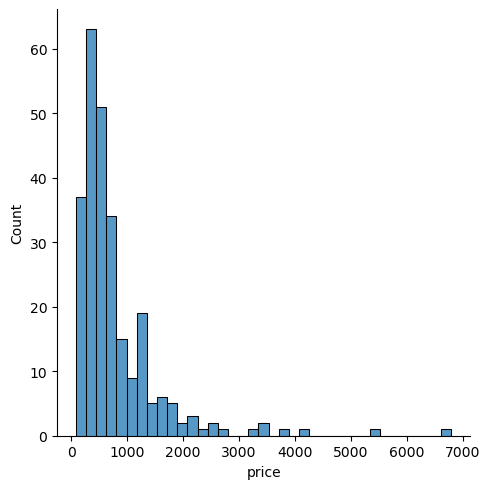

In [513]:
sns.displot(data=df['price'])

Little skewed

<Axes: xlabel='brand'>

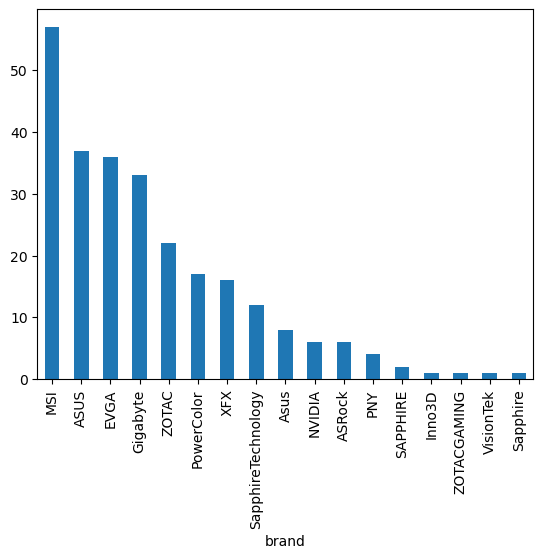

In [514]:
df['brand'].value_counts().plot(kind='bar')

we can remove brands with lower value and lesser known ones.

Average price of gpu brand wise-> already done above 

memory affect on price


<Axes: xlabel='memory', ylabel='price'>

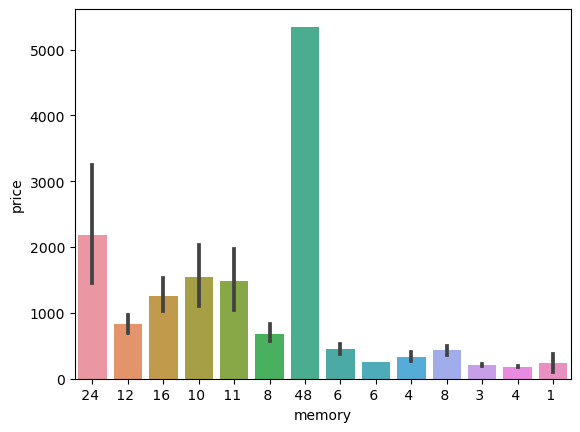

In [515]:
sns.barplot(x=df['memory'],y=df['price'])

looks like there is an outlier in memory with 48 gb

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


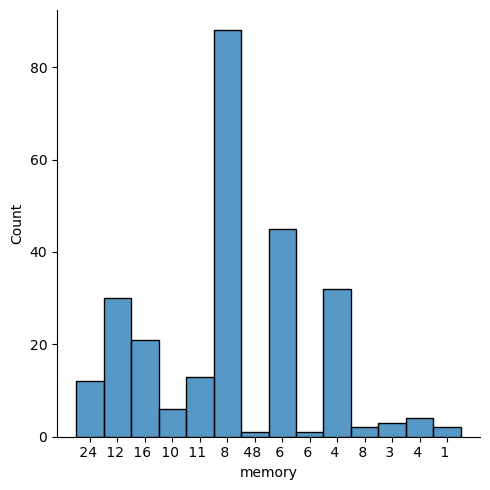

In [516]:
sns.displot(df['memory'])

<Axes: xlabel='memory', ylabel='price'>

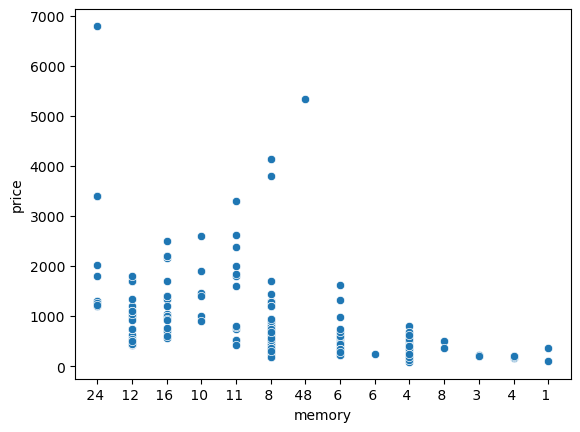

In [517]:
sns.scatterplot(x=df['memory'],y=df['price'])

majorly 8-12

Memory interface and interface columns

In [518]:
df['interface'].value_counts()

interface
 PCIe x16                228
 PCI Express 3.0 x16      16
 PCI Express 4.0 x16       5
 PCI Express 3.0 x16       5
 PCIe 4.0x16               2
 PCI Express 3.0           2
 PCI-Express 4.0 x16       1
 PCIe 4.0 x16              1
Name: count, dtype: int64

we always have versions and x model

In [519]:
df['interface x16 4.0']=df['interface'].apply(lambda x: 1 if '4.0' in x else 0)

C:\Users\Dell\AppData\Local\Temp\ipykernel_34284\738966247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['interface x16 4.0']=df['interface'].apply(lambda x: 1 if '4.0' in x else 0)


In [520]:
df

,brand,memory,memory_interface,length (mm),interface,chipset,base_clock(MHz),clock_speed(MHz),frame_sync,price,used,interface x16 4.0
0,MSI,24,GDRR6X,335,PCIe x16,GeForce RTX 3090,1395,1785,G-Sync,1289.99,0,0
1,EVGA,24,GDDR6X,300,PCIe x16,GeForce RTX 3090,1395,1800,G-Sync,1199.99,0,0
2,ASUS,24,GDDR6X,318.5,PCIe x16,GeForce RTX 3090,1395,1890,G-Sync,1794.99,0,0
3,MSI,24,GDDR6X,336,PCIe x16,GeForce RTX 3090,1395,1875,G-Sync,2017.21,0,0
4,Gigabyte,24,GDDR6X,319,PCIe x16,GeForce RTX 3090,1395,1860,G-Sync,3399.99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
291,PowerColor,16,GDDR6,320,PCIe x16,Radeon RX 6900 XT,1825,2340,FreeSync,2199.99,0,0
292,ASUS,16,GDDR6,277,PCIe x16,Radeon RX 6900 XT,1950,2365,FreeSync,1394.99,0,0
296,XFX,1,GDDR5,234,PCIe x16,Radeon HD 6850,775,1100,FreeSync,369.00,0,0
302,PowerColor,1,DDR3,,PCIe x16,Radeon HD 5450,650,1100,,99.99,0,0


<Axes: xlabel='interface x16 4.0'>

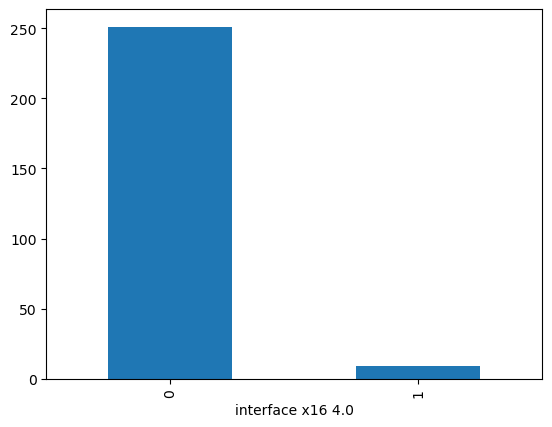

In [521]:
df['interface x16 4.0'].value_counts().plot(kind='bar')

majority of the gpus do not have interface x16 4.0

<Axes: xlabel='interface x16 4.0', ylabel='price'>

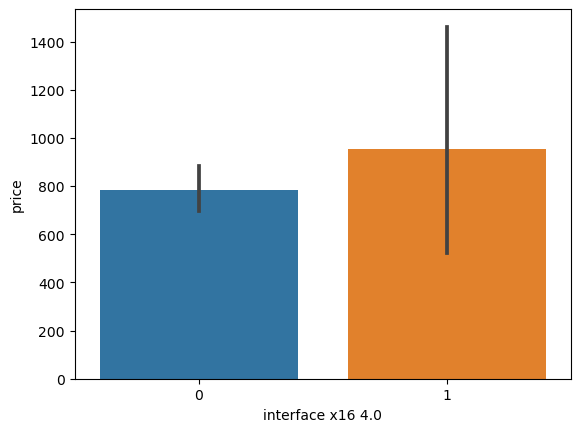

In [522]:
sns.barplot(x=df['interface x16 4.0'],y=df['price'])

if a gpu will have this interface then its price will be on higher side

<h2>Thank you nitish sir for this in depth analysis.</h2>

chipset analysis 

In [523]:
df['chipset series']=df['chipset'].str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0] if x else '')

C:\Users\Dell\AppData\Local\Temp\ipykernel_34284\484823900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chipset series']=df['chipset'].str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0] if x else '')


we got chipset series

In [524]:
df

,brand,memory,memory_interface,length (mm),interface,chipset,base_clock(MHz),clock_speed(MHz),frame_sync,price,used,interface x16 4.0,chipset series
0,MSI,24,GDRR6X,335,PCIe x16,GeForce RTX 3090,1395,1785,G-Sync,1289.99,0,0,3090
1,EVGA,24,GDDR6X,300,PCIe x16,GeForce RTX 3090,1395,1800,G-Sync,1199.99,0,0,3090
2,ASUS,24,GDDR6X,318.5,PCIe x16,GeForce RTX 3090,1395,1890,G-Sync,1794.99,0,0,3090
3,MSI,24,GDDR6X,336,PCIe x16,GeForce RTX 3090,1395,1875,G-Sync,2017.21,0,0,3090
4,Gigabyte,24,GDDR6X,319,PCIe x16,GeForce RTX 3090,1395,1860,G-Sync,3399.99,0,0,3090
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,PowerColor,16,GDDR6,320,PCIe x16,Radeon RX 6900 XT,1825,2340,FreeSync,2199.99,0,0,6900
292,ASUS,16,GDDR6,277,PCIe x16,Radeon RX 6900 XT,1950,2365,FreeSync,1394.99,0,0,6900
296,XFX,1,GDDR5,234,PCIe x16,Radeon HD 6850,775,1100,FreeSync,369.00,0,0,6850
302,PowerColor,1,DDR3,,PCIe x16,Radeon HD 5450,650,1100,,99.99,0,0,5450


In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 0 to 310
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              260 non-null    object 
 1   memory             260 non-null    object 
 2   memory_interface   260 non-null    object 
 3   length (mm)        260 non-null    object 
 4   interface          260 non-null    object 
 5   chipset            260 non-null    object 
 6   base_clock(MHz)    260 non-null    object 
 7   clock_speed(MHz)   260 non-null    object 
 8   frame_sync         260 non-null    object 
 9   price              260 non-null    float64
 10  used               260 non-null    int64  
 11  interface x16 4.0  260 non-null    int64  
 12  chipset series     260 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 28.4+ KB


In [526]:
df['chipset series'].dtype

dtype('O')

In [527]:
df.dtypes

brand                 object
memory                object
memory_interface      object
length (mm)           object
interface             object
chipset               object
base_clock(MHz)       object
clock_speed(MHz)      object
frame_sync            object
price                float64
used                   int64
interface x16 4.0      int64
chipset series        object
dtype: object

In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 0 to 310
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              260 non-null    object 
 1   memory             260 non-null    object 
 2   memory_interface   260 non-null    object 
 3   length (mm)        260 non-null    object 
 4   interface          260 non-null    object 
 5   chipset            260 non-null    object 
 6   base_clock(MHz)    260 non-null    object 
 7   clock_speed(MHz)   260 non-null    object 
 8   frame_sync         260 non-null    object 
 9   price              260 non-null    float64
 10  used               260 non-null    int64  
 11  interface x16 4.0  260 non-null    int64  
 12  chipset series     260 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 28.4+ KB


In [529]:
df['chipset series']=pd.to_numeric(df['chipset series'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_34284\460333403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chipset series']=pd.to_numeric(df['chipset series'])


In [530]:
df

,brand,memory,memory_interface,length (mm),interface,chipset,base_clock(MHz),clock_speed(MHz),frame_sync,price,used,interface x16 4.0,chipset series
0,MSI,24,GDRR6X,335,PCIe x16,GeForce RTX 3090,1395,1785,G-Sync,1289.99,0,0,3090.0
1,EVGA,24,GDDR6X,300,PCIe x16,GeForce RTX 3090,1395,1800,G-Sync,1199.99,0,0,3090.0
2,ASUS,24,GDDR6X,318.5,PCIe x16,GeForce RTX 3090,1395,1890,G-Sync,1794.99,0,0,3090.0
3,MSI,24,GDDR6X,336,PCIe x16,GeForce RTX 3090,1395,1875,G-Sync,2017.21,0,0,3090.0
4,Gigabyte,24,GDDR6X,319,PCIe x16,GeForce RTX 3090,1395,1860,G-Sync,3399.99,0,0,3090.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,PowerColor,16,GDDR6,320,PCIe x16,Radeon RX 6900 XT,1825,2340,FreeSync,2199.99,0,0,6900.0
292,ASUS,16,GDDR6,277,PCIe x16,Radeon RX 6900 XT,1950,2365,FreeSync,1394.99,0,0,6900.0
296,XFX,1,GDDR5,234,PCIe x16,Radeon HD 6850,775,1100,FreeSync,369.00,0,0,6850.0
302,PowerColor,1,DDR3,,PCIe x16,Radeon HD 5450,650,1100,,99.99,0,0,5450.0


In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 0 to 310
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              260 non-null    object 
 1   memory             260 non-null    object 
 2   memory_interface   260 non-null    object 
 3   length (mm)        260 non-null    object 
 4   interface          260 non-null    object 
 5   chipset            260 non-null    object 
 6   base_clock(MHz)    260 non-null    object 
 7   clock_speed(MHz)   260 non-null    object 
 8   frame_sync         260 non-null    object 
 9   price              260 non-null    float64
 10  used               260 non-null    int64  
 11  interface x16 4.0  260 non-null    int64  
 12  chipset series     258 non-null    float64
dtypes: float64(2), int64(2), object(9)
memory usage: 28.4+ KB


In [532]:
# Extract the series number from the memory_interface column
df['memory_card_series'] = df['memory_interface'].str.extract(r'(\d+)')

C:\Users\Dell\AppData\Local\Temp\ipykernel_34284\3537010653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['memory_card_series'] = df['memory_interface'].str.extract(r'(\d+)')


In [533]:
df

,brand,memory,memory_interface,length (mm),interface,chipset,base_clock(MHz),clock_speed(MHz),frame_sync,price,used,interface x16 4.0,chipset series,memory_card_series
0,MSI,24,GDRR6X,335,PCIe x16,GeForce RTX 3090,1395,1785,G-Sync,1289.99,0,0,3090.0,6
1,EVGA,24,GDDR6X,300,PCIe x16,GeForce RTX 3090,1395,1800,G-Sync,1199.99,0,0,3090.0,6
2,ASUS,24,GDDR6X,318.5,PCIe x16,GeForce RTX 3090,1395,1890,G-Sync,1794.99,0,0,3090.0,6
3,MSI,24,GDDR6X,336,PCIe x16,GeForce RTX 3090,1395,1875,G-Sync,2017.21,0,0,3090.0,6
4,Gigabyte,24,GDDR6X,319,PCIe x16,GeForce RTX 3090,1395,1860,G-Sync,3399.99,0,0,3090.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,PowerColor,16,GDDR6,320,PCIe x16,Radeon RX 6900 XT,1825,2340,FreeSync,2199.99,0,0,6900.0,6
292,ASUS,16,GDDR6,277,PCIe x16,Radeon RX 6900 XT,1950,2365,FreeSync,1394.99,0,0,6900.0,6
296,XFX,1,GDDR5,234,PCIe x16,Radeon HD 6850,775,1100,FreeSync,369.00,0,0,6850.0,5
302,PowerColor,1,DDR3,,PCIe x16,Radeon HD 5450,650,1100,,99.99,0,0,5450.0,3


<Axes: xlabel='memory_card_series', ylabel='price'>

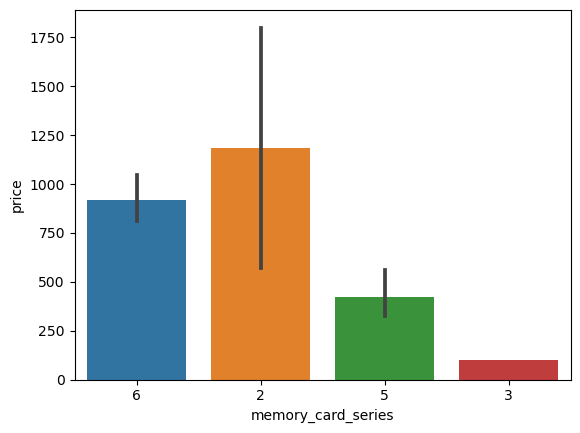

In [534]:
sns.barplot(x=df['memory_card_series'],y=df['price'])

<Figure size 2.5e+06x2.5e+06 with 0 Axes>

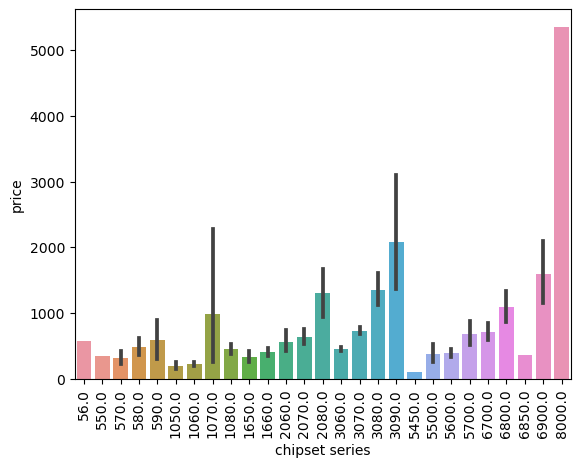

In [535]:
sns.barplot(x=df['chipset series'],y=df['price'])
plt.xticks(rotation='vertical')
ax.set_xticklabels([])
plt.Figure(figsize=(25000,25000))

8000 series chipsets have the highest price.

In [536]:
df

,brand,memory,memory_interface,length (mm),interface,chipset,base_clock(MHz),clock_speed(MHz),frame_sync,price,used,interface x16 4.0,chipset series,memory_card_series
0,MSI,24,GDRR6X,335,PCIe x16,GeForce RTX 3090,1395,1785,G-Sync,1289.99,0,0,3090.0,6
1,EVGA,24,GDDR6X,300,PCIe x16,GeForce RTX 3090,1395,1800,G-Sync,1199.99,0,0,3090.0,6
2,ASUS,24,GDDR6X,318.5,PCIe x16,GeForce RTX 3090,1395,1890,G-Sync,1794.99,0,0,3090.0,6
3,MSI,24,GDDR6X,336,PCIe x16,GeForce RTX 3090,1395,1875,G-Sync,2017.21,0,0,3090.0,6
4,Gigabyte,24,GDDR6X,319,PCIe x16,GeForce RTX 3090,1395,1860,G-Sync,3399.99,0,0,3090.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,PowerColor,16,GDDR6,320,PCIe x16,Radeon RX 6900 XT,1825,2340,FreeSync,2199.99,0,0,6900.0,6
292,ASUS,16,GDDR6,277,PCIe x16,Radeon RX 6900 XT,1950,2365,FreeSync,1394.99,0,0,6900.0,6
296,XFX,1,GDDR5,234,PCIe x16,Radeon HD 6850,775,1100,FreeSync,369.00,0,0,6850.0,5
302,PowerColor,1,DDR3,,PCIe x16,Radeon HD 5450,650,1100,,99.99,0,0,5450.0,3


In [537]:
import numpy as np
num_columns=df.select_dtypes(include=np.number)

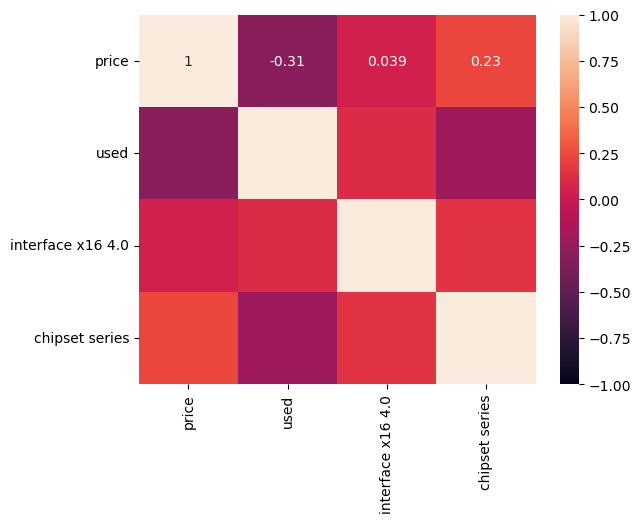

In [538]:
sns.heatmap(data=num_columns.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

negative co relation with used. This is 100% correct. Used gpus price will always be negatively affected.

Now only frame sync is left for extraction and analysis.

<Axes: xlabel='frame_sync'>

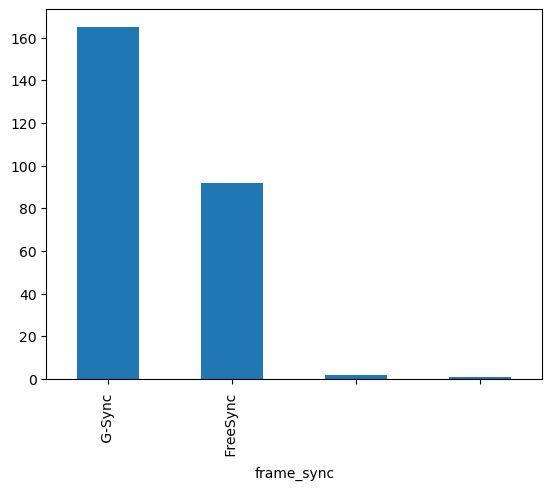

In [539]:
df['frame_sync'].value_counts().plot(kind='bar')

there are two unnamed frame syncs. lets try to get them and analyse them.

<Axes: xlabel='frame_sync', ylabel='price'>

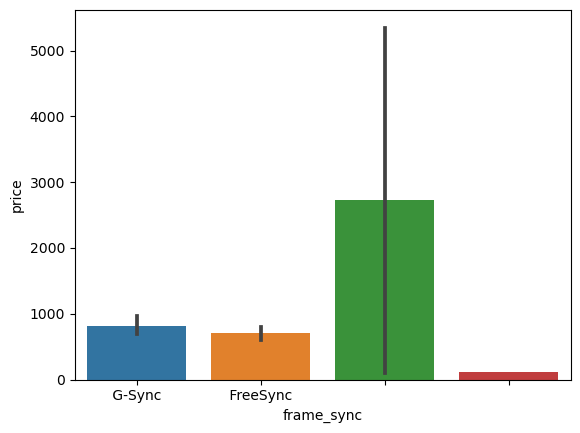

In [540]:
sns.barplot(x=df['frame_sync'],y=df['price'])

ye kya data hai bhai. jiski price sabse zyada hai uska naam hi nhi hai kuch gazab.

In [541]:
df

,brand,memory,memory_interface,length (mm),interface,chipset,base_clock(MHz),clock_speed(MHz),frame_sync,price,used,interface x16 4.0,chipset series,memory_card_series
0,MSI,24,GDRR6X,335,PCIe x16,GeForce RTX 3090,1395,1785,G-Sync,1289.99,0,0,3090.0,6
1,EVGA,24,GDDR6X,300,PCIe x16,GeForce RTX 3090,1395,1800,G-Sync,1199.99,0,0,3090.0,6
2,ASUS,24,GDDR6X,318.5,PCIe x16,GeForce RTX 3090,1395,1890,G-Sync,1794.99,0,0,3090.0,6
3,MSI,24,GDDR6X,336,PCIe x16,GeForce RTX 3090,1395,1875,G-Sync,2017.21,0,0,3090.0,6
4,Gigabyte,24,GDDR6X,319,PCIe x16,GeForce RTX 3090,1395,1860,G-Sync,3399.99,0,0,3090.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,PowerColor,16,GDDR6,320,PCIe x16,Radeon RX 6900 XT,1825,2340,FreeSync,2199.99,0,0,6900.0,6
292,ASUS,16,GDDR6,277,PCIe x16,Radeon RX 6900 XT,1950,2365,FreeSync,1394.99,0,0,6900.0,6
296,XFX,1,GDDR5,234,PCIe x16,Radeon HD 6850,775,1100,FreeSync,369.00,0,0,6850.0,5
302,PowerColor,1,DDR3,,PCIe x16,Radeon HD 5450,650,1100,,99.99,0,0,5450.0,3


In [542]:
df['frame_sync'].unique()

array([' G-Sync ', ' FreeSync ', '  ', ' '], dtype=object)

In [543]:
df.drop(df[df['frame_sync'] =='  '].index, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_34284\2680124809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['frame_sync'] =='  '].index, inplace=True)


In [544]:
df.drop(df[df['frame_sync'] ==' '].index, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_34284\3780815121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['frame_sync'] ==' '].index, inplace=True)


In [545]:
df

,brand,memory,memory_interface,length (mm),interface,chipset,base_clock(MHz),clock_speed(MHz),frame_sync,price,used,interface x16 4.0,chipset series,memory_card_series
0,MSI,24,GDRR6X,335,PCIe x16,GeForce RTX 3090,1395,1785,G-Sync,1289.99,0,0,3090.0,6
1,EVGA,24,GDDR6X,300,PCIe x16,GeForce RTX 3090,1395,1800,G-Sync,1199.99,0,0,3090.0,6
2,ASUS,24,GDDR6X,318.5,PCIe x16,GeForce RTX 3090,1395,1890,G-Sync,1794.99,0,0,3090.0,6
3,MSI,24,GDDR6X,336,PCIe x16,GeForce RTX 3090,1395,1875,G-Sync,2017.21,0,0,3090.0,6
4,Gigabyte,24,GDDR6X,319,PCIe x16,GeForce RTX 3090,1395,1860,G-Sync,3399.99,0,0,3090.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,SapphireTechnology,16,GDDR6,310,PCIe x16,Radeon RX 6900 XT,1825,2365,FreeSync,927.99,0,0,6900.0,6
291,PowerColor,16,GDDR6,320,PCIe x16,Radeon RX 6900 XT,1825,2340,FreeSync,2199.99,0,0,6900.0,6
292,ASUS,16,GDDR6,277,PCIe x16,Radeon RX 6900 XT,1950,2365,FreeSync,1394.99,0,0,6900.0,6
296,XFX,1,GDDR5,234,PCIe x16,Radeon HD 6850,775,1100,FreeSync,369.00,0,0,6850.0,5


memory_interface, interface, chipset drop these 

In [546]:
df=df.drop(labels=['memory_interface','interface','chipset'],axis=1)

In [547]:
df

,brand,memory,length (mm),base_clock(MHz),clock_speed(MHz),frame_sync,price,used,interface x16 4.0,chipset series,memory_card_series
0,MSI,24,335,1395,1785,G-Sync,1289.99,0,0,3090.0,6
1,EVGA,24,300,1395,1800,G-Sync,1199.99,0,0,3090.0,6
2,ASUS,24,318.5,1395,1890,G-Sync,1794.99,0,0,3090.0,6
3,MSI,24,336,1395,1875,G-Sync,2017.21,0,0,3090.0,6
4,Gigabyte,24,319,1395,1860,G-Sync,3399.99,0,0,3090.0,6
...,...,...,...,...,...,...,...,...,...,...,...
290,SapphireTechnology,16,310,1825,2365,FreeSync,927.99,0,0,6900.0,6
291,PowerColor,16,320,1825,2340,FreeSync,2199.99,0,0,6900.0,6
292,ASUS,16,277,1950,2365,FreeSync,1394.99,0,0,6900.0,6
296,XFX,1,234,775,1100,FreeSync,369.00,0,0,6850.0,5


<Axes: xlabel='frame_sync', ylabel='price'>

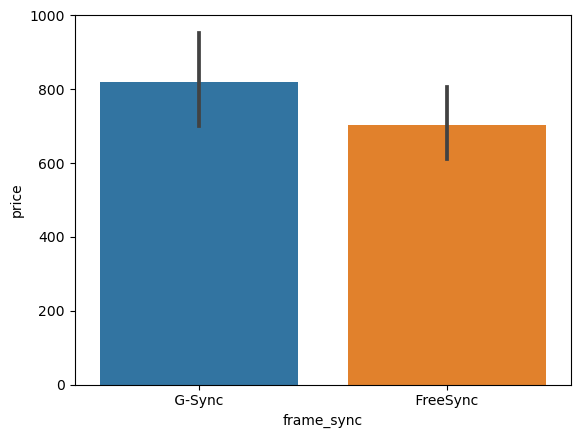

In [548]:
sns.barplot(x=df['frame_sync'],y=df['price'])

G-sync has higher price than freesync

Applying one hot encoding on brand and frame_sync

In [549]:
from sklearn.preprocessing import LabelEncoder

In [550]:
le=LabelEncoder()

In [551]:
df['frame_sync']=le.fit_transform(df['frame_sync'])

free_sync->0
g_sync->1

In [552]:
df

,brand,memory,length (mm),base_clock(MHz),clock_speed(MHz),frame_sync,price,used,interface x16 4.0,chipset series,memory_card_series
0,MSI,24,335,1395,1785,1,1289.99,0,0,3090.0,6
1,EVGA,24,300,1395,1800,1,1199.99,0,0,3090.0,6
2,ASUS,24,318.5,1395,1890,1,1794.99,0,0,3090.0,6
3,MSI,24,336,1395,1875,1,2017.21,0,0,3090.0,6
4,Gigabyte,24,319,1395,1860,1,3399.99,0,0,3090.0,6
...,...,...,...,...,...,...,...,...,...,...,...
290,SapphireTechnology,16,310,1825,2365,0,927.99,0,0,6900.0,6
291,PowerColor,16,320,1825,2340,0,2199.99,0,0,6900.0,6
292,ASUS,16,277,1950,2365,0,1394.99,0,0,6900.0,6
296,XFX,1,234,775,1100,0,369.00,0,0,6850.0,5


Lets drop brand

In [553]:
df=df.drop('brand',axis=1)

Model Building

In [554]:
df.dtypes

memory                 object
length (mm)            object
base_clock(MHz)        object
clock_speed(MHz)       object
frame_sync              int32
price                 float64
used                    int64
interface x16 4.0       int64
chipset series        float64
memory_card_series     object
dtype: object

In [555]:
df['memory']=df['memory'].astype('int')

In [556]:
df

,memory,length (mm),base_clock(MHz),clock_speed(MHz),frame_sync,price,used,interface x16 4.0,chipset series,memory_card_series
0,24,335,1395,1785,1,1289.99,0,0,3090.0,6
1,24,300,1395,1800,1,1199.99,0,0,3090.0,6
2,24,318.5,1395,1890,1,1794.99,0,0,3090.0,6
3,24,336,1395,1875,1,2017.21,0,0,3090.0,6
4,24,319,1395,1860,1,3399.99,0,0,3090.0,6
...,...,...,...,...,...,...,...,...,...,...
290,16,310,1825,2365,0,927.99,0,0,6900.0,6
291,16,320,1825,2340,0,2199.99,0,0,6900.0,6
292,16,277,1950,2365,0,1394.99,0,0,6900.0,6
296,1,234,775,1100,0,369.00,0,0,6850.0,5


In [557]:
df.dtypes

memory                  int32
length (mm)            object
base_clock(MHz)        object
clock_speed(MHz)       object
frame_sync              int32
price                 float64
used                    int64
interface x16 4.0       int64
chipset series        float64
memory_card_series     object
dtype: object

In [558]:
df['length (mm)'] = pd.to_numeric(df['length (mm)'], errors='coerce')
df['base_clock(MHz)'] = pd.to_numeric(df['base_clock(MHz)'], errors='coerce')
df['clock_speed(MHz)'] = pd.to_numeric(df['clock_speed(MHz)'], errors='coerce')

# Convert memory_card_series to int64
df['memory_card_series'] = df['memory_card_series'].astype('int64')
##gpt

In [559]:
df.dtypes

memory                  int32
length (mm)           float64
base_clock(MHz)         int64
clock_speed(MHz)        int64
frame_sync              int32
price                 float64
used                    int64
interface x16 4.0       int64
chipset series        float64
memory_card_series      int64
dtype: object

In [560]:
# Check for NaN values in the DataFrame
nan_rows = df[df.isna().any(axis=1)]

# Print the rows with NaN values
print(nan_rows)


     memory  length (mm)  base_clock(MHz)  clock_speed(MHz)  frame_sync  \
42       24        266.7             1350              1770           1   
65       12        267.0             1200              1455           1   
177       6          NaN             1500              1860           1   

       price  used  interface x16 4.0  chipset series  memory_card_series  
42   3399.99     0                  0             NaN                   6  
65   1799.99     0                  0             NaN                   2  
177   988.86     1                  0          1660.0                   6  


In [561]:
df.isna().sum()

memory                0
length (mm)           1
base_clock(MHz)       0
clock_speed(MHz)      0
frame_sync            0
price                 0
used                  0
interface x16 4.0     0
chipset series        2
memory_card_series    0
dtype: int64

In [562]:
df

,memory,length (mm),base_clock(MHz),clock_speed(MHz),frame_sync,price,used,interface x16 4.0,chipset series,memory_card_series
0,24,335.0,1395,1785,1,1289.99,0,0,3090.0,6
1,24,300.0,1395,1800,1,1199.99,0,0,3090.0,6
2,24,318.5,1395,1890,1,1794.99,0,0,3090.0,6
3,24,336.0,1395,1875,1,2017.21,0,0,3090.0,6
4,24,319.0,1395,1860,1,3399.99,0,0,3090.0,6
...,...,...,...,...,...,...,...,...,...,...
290,16,310.0,1825,2365,0,927.99,0,0,6900.0,6
291,16,320.0,1825,2340,0,2199.99,0,0,6900.0,6
292,16,277.0,1950,2365,0,1394.99,0,0,6900.0,6
296,1,234.0,775,1100,0,369.00,0,0,6850.0,5


In [563]:
# Check for NaN values in the DataFrame
nan_rows = df[df.isna().any(axis=1)]

# Print the rows with NaN values
print(nan_rows)


     memory  length (mm)  base_clock(MHz)  clock_speed(MHz)  frame_sync  \
42       24        266.7             1350              1770           1   
65       12        267.0             1200              1455           1   
177       6          NaN             1500              1860           1   

       price  used  interface x16 4.0  chipset series  memory_card_series  
42   3399.99     0                  0             NaN                   6  
65   1799.99     0                  0             NaN                   2  
177   988.86     1                  0          1660.0                   6  


In [564]:
df.isna().sum()

memory                0
length (mm)           1
base_clock(MHz)       0
clock_speed(MHz)      0
frame_sync            0
price                 0
used                  0
interface x16 4.0     0
chipset series        2
memory_card_series    0
dtype: int64

In [565]:
df.isnull().sum()

memory                0
length (mm)           1
base_clock(MHz)       0
clock_speed(MHz)      0
frame_sync            0
price                 0
used                  0
interface x16 4.0     0
chipset series        2
memory_card_series    0
dtype: int64

In [569]:
df.drop([42,65,177],inplace=True)

In [570]:
# Check for NaN values in the DataFrame
nan_rows = df[df.isna().any(axis=1)]

# Print the rows with NaN values
print(nan_rows)


Empty DataFrame
Columns: [memory, length (mm), base_clock(MHz), clock_speed(MHz), frame_sync, price, used, interface x16 4.0, chipset series, memory_card_series]
Index: []


In [571]:
df.isna().sum()

memory                0
length (mm)           0
base_clock(MHz)       0
clock_speed(MHz)      0
frame_sync            0
price                 0
used                  0
interface x16 4.0     0
chipset series        0
memory_card_series    0
dtype: int64

In [572]:
df.isnull().sum()

memory                0
length (mm)           0
base_clock(MHz)       0
clock_speed(MHz)      0
frame_sync            0
price                 0
used                  0
interface x16 4.0     0
chipset series        0
memory_card_series    0
dtype: int64

Final df used for training and testing

In [573]:
df

,memory,length (mm),base_clock(MHz),clock_speed(MHz),frame_sync,price,used,interface x16 4.0,chipset series,memory_card_series
0,24,335.0,1395,1785,1,1289.99,0,0,3090.0,6
1,24,300.0,1395,1800,1,1199.99,0,0,3090.0,6
2,24,318.5,1395,1890,1,1794.99,0,0,3090.0,6
3,24,336.0,1395,1875,1,2017.21,0,0,3090.0,6
4,24,319.0,1395,1860,1,3399.99,0,0,3090.0,6
...,...,...,...,...,...,...,...,...,...,...
290,16,310.0,1825,2365,0,927.99,0,0,6900.0,6
291,16,320.0,1825,2340,0,2199.99,0,0,6900.0,6
292,16,277.0,1950,2365,0,1394.99,0,0,6900.0,6
296,1,234.0,775,1100,0,369.00,0,0,6850.0,5


In [575]:
from sklearn.model_selection import train_test_split


In [581]:
X=df.drop('price',axis=1)

In [582]:
X

,memory,length (mm),base_clock(MHz),clock_speed(MHz),frame_sync,used,interface x16 4.0,chipset series,memory_card_series
0,24,335.0,1395,1785,1,0,0,3090.0,6
1,24,300.0,1395,1800,1,0,0,3090.0,6
2,24,318.5,1395,1890,1,0,0,3090.0,6
3,24,336.0,1395,1875,1,0,0,3090.0,6
4,24,319.0,1395,1860,1,0,0,3090.0,6
...,...,...,...,...,...,...,...,...,...
290,16,310.0,1825,2365,0,0,0,6900.0,6
291,16,320.0,1825,2340,0,0,0,6900.0,6
292,16,277.0,1950,2365,0,0,0,6900.0,6
296,1,234.0,775,1100,0,0,0,6850.0,5


In [583]:
Y=df['price']

In [584]:
Y

0      1289.99
1      1199.99
2      1794.99
3      2017.21
4      3399.99
        ...   
290     927.99
291    2199.99
292    1394.99
296     369.00
310     399.00
Name: price, Length: 254, dtype: float64

In [585]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.70,random_state=1234)

In [603]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [587]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [588]:
Y_predict=lr.predict(X_test)

In [589]:
Y_predict

array([ 557.24857391,  611.21057578, 1082.09815396, 1167.21082593,
        312.0811288 , 1502.7999117 ,  599.33645162,  766.42416331,
        574.23011219, 1635.75598041,  530.18625879,  438.22199706,
        600.99289173,  727.32861533, 1023.35055391,  873.69099143,
       1589.55609251,  730.10596017, 1127.04081974,  788.26977563,
        480.63929516,  659.45995032,  798.4140312 ,  577.0846347 ,
       1645.68069454,  505.72245712,  577.55849358,  327.60462981,
        888.07619642,  387.95646391, 1119.91103792,  516.45129869,
        763.94984795,  643.90390419,  392.75981537,  400.43974561,
        484.83064048,  576.55052055,  550.05026659,  479.72203904,
        925.82844544,  578.08947821,  568.02857991,  695.70762659,
        553.27743121,  530.18625879,  600.39144618,  758.67420556,
        689.63782279,  925.47301696, 1035.53485677,  800.72900879,
        116.84020778,  407.67960327,  821.98798115,  839.18855457,
        815.53776785,  577.50002333,  269.36201675,  728.79096

In [591]:
Y_test

237    1200.00
105     469.74
34     1399.99
291    2199.99
250      84.00
        ...   
221     199.99
22     1349.90
172     349.00
191     311.22
213     199.99
Name: price, Length: 77, dtype: float64

In [592]:
lr.score(X_test,Y_predict)

1.0

In [596]:
from sklearn.metrics import r2_score,mean_absolute_error

In [594]:
r2=r2_score(Y_test,Y_predict)

In [595]:
r2

0.2146103074489546

In [597]:
mae=mean_absolute_error(Y_test,Y_predict)

In [598]:
mae

461.20143383792936

In [601]:
import math
mae_rounded=np.round(mae,2)

In [602]:
mae_rounded

461.2

In [608]:
ridge=Ridge()
ridge.fit(X_train,Y_train)

Ridge()

In [609]:
Y_predict_ridge=ridge.predict(X_test)

In [611]:
ridge.score(X_test,Y_predict_ridge)

1.0

In [612]:
r2_ridge=r2_score(Y_test,Y_predict_ridge)

In [613]:
r2_ridge

0.2130157183937178

In [614]:
mae_ridge=mean_absolute_error(Y_test,Y_predict_ridge)

In [615]:
mae_ridge

461.6776051695928

In [617]:
lasso=Lasso()
lasso.fit(X_train,Y_train)

Lasso()

In [618]:
Y_predict_lasso=lasso.predict(X_test)

In [634]:
lasso.score(X_test,Y_predict_lasso)

1.0

In [621]:
r2_lasso=r2_score(Y_test,Y_predict_lasso)

In [622]:
r2_lasso

0.21242655010955447

In [629]:
mae_lasso=mean_absolute_error(Y_test,Y_predict_lasso)

In [630]:
mae_lasso

461.71944584209695

In [623]:
from sklearn.ensemble import GradientBoostingRegressor

In [624]:
gbr=GradientBoostingRegressor()

In [625]:
gbr.fit(X_train,Y_train)

GradientBoostingRegressor()

In [626]:
Y_predict_gbr=gbr.predict(X_test)

In [631]:
mae_gbr=mean_absolute_error(Y_test,Y_predict_gbr)

In [632]:
mae_gbr

457.2105527885955

In [627]:
r2_gbr=r2_score(Y_test,Y_predict_gbr)

In [628]:
r2_gbr

0.19687129653937896

In [637]:
rmse_gbr= np.square(np.subtract(Y_test,Y_predict_gbr)).mean()   
   
rsme = math.sqrt(rmse_gbr)  

In [638]:
rsme

948.6649337618489

In [639]:
from sklearn.ensemble import RandomForestRegressor

In [640]:
rfr=RandomForestRegressor()

In [641]:
rfr.fit(X_train,Y_train)

RandomForestRegressor()

In [643]:
Y_rfr_predict=rfr.predict(X_test)

In [644]:
rmse_rf=np.square(np.subtract(Y_test,Y_rfr_predict)).mean()   
   
rsme_rfr = math.sqrt(rmse_rf)

In [645]:
rsme_rfr

964.5713270977024

In [646]:
r2_rfr=r2_score(Y_test,Y_rfr_predict)

In [647]:
r2_rfr

0.16971317215233228

The model did not perfrom well.

In [649]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# Example for Ridge Regression
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)
print(f"Best parameters: {grid_search.best_params_}")

# Example for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(rfr, param_grid, cv=5)
grid_search.fit(X_train, Y_train)
print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'alpha': 10.0}
Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [651]:
ridge=Ridge(alpha=10.0)
ridge.fit(X_train,Y_train)
Y_predict_ridge=ridge.predict(X_test)
ridge.score(X_test,Y_predict_ridge)
r2_ridge=r2_score(Y_test,Y_predict_ridge)
r2_ridge

0.20427764828078787

In [652]:
rfr=RandomForestRegressor(n_estimators=300,max_depth=30,min_samples_leaf=1,min_samples_split=2)
rfr.fit(X_train,Y_train)
Y_rfr_predict=rfr.predict(X_test)
rmse_rf=np.square(np.subtract(Y_test,Y_rfr_predict)).mean()   
   
rsme_rfr = math.sqrt(rmse_rf)
rsme_rfr

965.5337502713418

In [653]:
r2_rfr=r2_score(Y_test,Y_rfr_predict)

In [654]:
r2_rfr

0.1680554700928486

The models did not perfrom well. Will once again do this project in future. Any suggestions are appreciated.

Dataset Link-> https://www.kaggle.com/datasets/shilongzhuang/gpu-prices-prediction